In [ ]:
!pip install -U scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import random

# Girdi değişkenleri (Olaylar)
geopolitik_gerilim = ctrl.Antecedent(np.arange(0, 11, 1), 'Geopolitik_Gerilim')
ekonomik_kriz = ctrl.Antecedent(np.arange(0, 11, 1), 'Ekonomik_Kriz')
merkez_bankasi_politika = ctrl.Antecedent(np.arange(0, 11, 1), 'Merkez_Bankasi_Politika')
politik_belirsizlik = ctrl.Antecedent(np.arange(0, 11, 1), 'Politik_Belirsizlik')
teknolojik_gelisme = ctrl.Antecedent(np.arange(0, 11, 1), 'Teknolojik_Gelisme')


# Çıkış değişkeni (Portföy)
portfoy = ctrl.Consequent(np.arange(0, 101, 1), 'Portfoy')

# Üyelik fonksiyonları tanımlama
geopolitik_gerilim.automf(3)
ekonomik_kriz.automf(3)
merkez_bankasi_politika.automf(3)
politik_belirsizlik.automf(3)
teknolojik_gelisme.automf(3)


portfoy['Kripto_Paralar'] = fuzz.trimf(portfoy.universe, [0, 0, 50])
portfoy['Arsa_Gayrimenkul'] = fuzz.trimf(portfoy.universe, [0, 50, 100])
portfoy['Borsa_Hisse_Senetleri'] = fuzz.trimf(portfoy.universe, [50, 100, 100])
portfoy['Altin_Kiyemetli_Metaller'] = fuzz.trimf(portfoy.universe, [0, 0, 50])
portfoy['Doviz'] = fuzz.trimf(portfoy.universe, [0, 50, 100])
portfoy['Tahviller_Bonolar'] = fuzz.trimf(portfoy.universe, [50, 100, 100])
portfoy['ETFler'] = fuzz.trimf(portfoy.universe, [0, 100, 100])
portfoy['Mevduat_Vadeli_Hesaplar'] = fuzz.trimf(portfoy.universe, [0, 50, 50])

# Kuralları tanımlama
rule1 = ctrl.Rule(geopolitik_gerilim['good'], portfoy['Kripto_Paralar'])
rule2 = ctrl.Rule(geopolitik_gerilim['average'], portfoy['Arsa_Gayrimenkul'])
rule3 = ctrl.Rule(geopolitik_gerilim['poor'], portfoy['Borsa_Hisse_Senetleri'])

rule4 = ctrl.Rule(ekonomik_kriz['good'], portfoy['Tahviller_Bonolar'])
rule5 = ctrl.Rule(ekonomik_kriz['average'], portfoy['Borsa_Hisse_Senetleri'])
rule6 = ctrl.Rule(ekonomik_kriz['poor'], portfoy['Altin_Kiyemetli_Metaller'])

rule7 = ctrl.Rule(merkez_bankasi_politika['good'], portfoy['Doviz'])
rule8 = ctrl.Rule(merkez_bankasi_politika['average'], portfoy['Tahviller_Bonolar'])
rule9 = ctrl.Rule(merkez_bankasi_politika['poor'], portfoy['Borsa_Hisse_Senetleri'])

rule10 = ctrl.Rule(politik_belirsizlik['good'], portfoy['Tahviller_Bonolar'])
rule11 = ctrl.Rule(politik_belirsizlik['average'], portfoy['Altin_Kiyemetli_Metaller'])
rule12 = ctrl.Rule(politik_belirsizlik['poor'], portfoy['Borsa_Hisse_Senetleri'])

rule13 = ctrl.Rule(teknolojik_gelisme['good'], portfoy['Borsa_Hisse_Senetleri'])
rule14 = ctrl.Rule(teknolojik_gelisme['average'], portfoy['Arsa_Gayrimenkul'])
rule15 = ctrl.Rule(teknolojik_gelisme['poor'], portfoy['Kripto_Paralar'])


# Yeni kuralları kontrol sistemine ekleme
portfoy_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
                        rule11, rule12, rule13, rule14, rule15])
portfoy_simulasyon = ctrl.ControlSystemSimulation(portfoy_ctrl)
geopolitik_gerilim_input = float(input("Geopolitik Gerilim (0-10 arası): "))
ekonomik_kriz_input = float(input("Ekonomik Kriz (0-10 arası): "))
merkez_bankasi_politika_input = float(input("Merkez Bankası Politika (0-10 arası): "))
politik_belirsizlik_input = float(input("Politik Belirsizlik (0-10 arası): "))
teknolojik_gelisme_input = float(input("Teknolojik Gelişme (0-10 arası): "))

# Girdilere değer atama
portfoy_simulasyon.input['Geopolitik_Gerilim'] = geopolitik_gerilim_input
portfoy_simulasyon.input['Ekonomik_Kriz'] = ekonomik_kriz_input
portfoy_simulasyon.input['Merkez_Bankasi_Politika'] = merkez_bankasi_politika_input
portfoy_simulasyon.input['Politik_Belirsizlik'] = politik_belirsizlik_input
portfoy_simulasyon.input['Teknolojik_Gelisme'] = teknolojik_gelisme_input





Geopolitik Gerilim (0-10 arası): 7
Ekonomik Kriz (0-10 arası): 3
Merkez Bankası Politika (0-10 arası): 6
Politik Belirsizlik (0-10 arası): 1
Teknolojik Gelişme (0-10 arası): 8


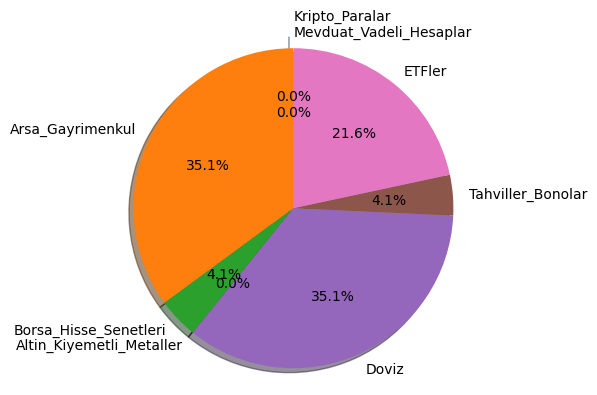

In [ ]:


portfoy_simulasyon.compute()
portfoy_degerleri = portfoy_simulasyon.output['Portfoy']
yatirim_araclari = ["Kripto_Paralar", "Arsa_Gayrimenkul", "Borsa_Hisse_Senetleri", "Altin_Kiyemetli_Metaller", "Doviz", "Tahviller_Bonolar", "ETFler", "Mevduat_Vadeli_Hesaplar"]

oranlar = []
for arac in yatirim_araclari:
    oran = fuzz.interp_membership(portfoy.universe, portfoy[arac].mf, portfoy_degerleri)
    oranlar.append(oran)


labels = yatirim_araclari
sizes = [oran * 100 for oran in oranlar]
explode = (0.1, 0, 0, 0, 0, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()